In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

Import Datasets

In [28]:
df_movie = pd.read_csv('rotten_tomatoes_movies.csv')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [29]:
df_movie.shape

(17712, 22)

In [30]:
df_critics = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
df_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [31]:
df_critics.shape

(1130017, 8)

In [32]:
df_merged = df_critics.merge(df_movie, how='inner', on='rotten_tomatoes_link')
df_merged.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [33]:
#Merging the two dataframes
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'tomatometer_status']]
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129887 entries, 0 to 1129886
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1129887 non-null  object
 1   movie_title           1129887 non-null  object
 2   review_content        1064109 non-null  object
 3   review_type           1129887 non-null  object
 4   tomatometer_status    1128421 non-null  object
dtypes: object(5)
memory usage: 43.1+ MB


Data Cleaning

In [35]:
df_merged.isnull().sum()

rotten_tomatoes_link        0
movie_title                 0
review_content          65778
review_type                 0
tomatometer_status       1466
dtype: int64

In [36]:
df_merged.dropna(axis=0, inplace=True)

[Text(0, 0, '680045'), Text(0, 0, '382703')]

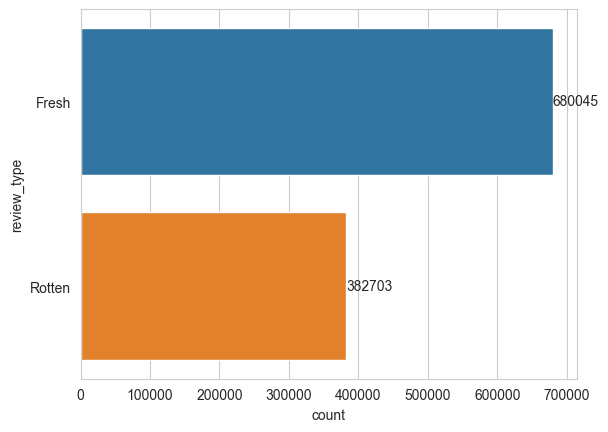

In [37]:
ax = sns.countplot(data=df_merged, y='review_type')
plt.bar_label(ax.containers[0])

In [38]:
#Pick only 5000 entries from the original data
df_sub = df_merged[:5000]

#Encode the labels
review_type = pd.DataFrame(df_sub['review_type'].replace(['Rotten', 'Fresh'], [0, 1]))

#Final DataFrame
df_feature_critics = pd.concat([df_sub['review_content'], review_type], axis=1)
df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


Splitting the data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df_feature_critics['review_content'],
    df_feature_critics['review_type'],
    test_size=0.2,
    random_state=42
)

In [40]:
print(f'train size: {X_train.shape[0]}\ntest size: {X_test.shape[0]}')

train size: 4000
test size: 1000


Tokenization

In [41]:
vectorizer = CountVectorizer(min_df=1)
X_train_vec = vectorizer.fit_transform(X_train).toarray()

In [42]:
X_train_vec.shape

(4000, 11692)

Random Forest Model

In [43]:
random_forest = RandomForestClassifier(random_state=2)
random_forest.fit(X_train_vec, y_train)
y_predict = random_forest.predict(vectorizer.transform(X_test).toarray())

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000


[[293 155]
 [157 395]]


Text(50.722222222222214, 0.5, 'ACTUAL')

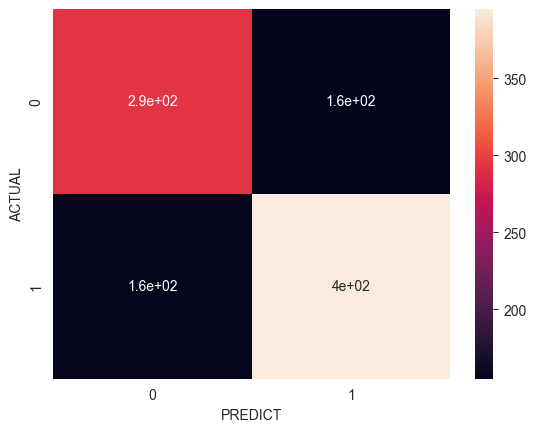

In [45]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

In [46]:
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(df_feature_critics['review_type']), y=df_feature_critics['review_type'].values)
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 1.058425063505504, 1: 0.9476876421531463}

In [47]:
random_forest_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
random_forest_weighted.fit(X_train_vec, y_train)
y_predict = random_forest_weighted.predict(vectorizer.transform(X_test).toarray())

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       448
           1       0.74      0.67      0.70       552

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000


[[322 126]
 [184 368]]


Text(50.722222222222214, 0.5, 'ACTUAL')

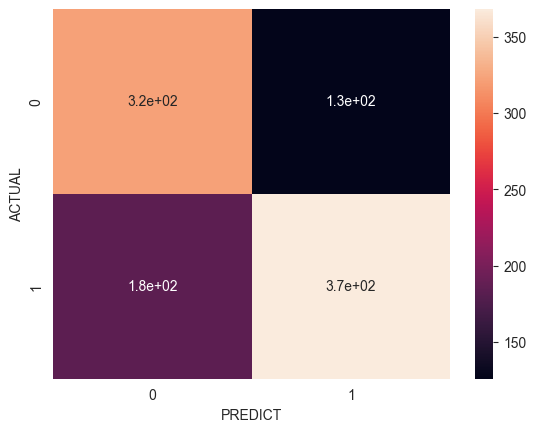

In [49]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

In [53]:
def predict_movie_status(prediction):
    positive_percentage = (prediction == 1).sum() / len(prediction) * 100
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    print(f'Positive review: {positive_percentage:.2f}%')
    print(f'Movies status: {prediction}')

Predictions

In [54]:
#Movie: body of lies
df_bol = df_merged[df_merged['movie_title'].str.lower() == 'body of lies']
df_bol

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten
...,...,...,...,...,...
7590,m/10009225-body_of_lies,Body of Lies,"A revealing, original and extremely dramatic f...",Fresh,Rotten
7591,m/10009225-body_of_lies,Body of Lies,The action sequences lack pizzazz and feel dec...,Rotten,Rotten
7592,m/10009225-body_of_lies,Body of Lies,"Body of Lies is a well-made film, but lacks th...",Rotten,Rotten
7593,m/10009225-body_of_lies,Body of Lies,"Body of Lies, on the whole, is a retrograde fa...",Fresh,Rotten


In [56]:
#Get predictions
y_predict_bol = random_forest_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predict_bol)

Positive review: 50.49%
Movies status: Rotten


In [58]:
#Get true value
df_merged['tomatometer_status'][df_merged['movie_title'].str.lower() == 'body of lies'].unique()

array(['Rotten'], dtype=object)

In [59]:
#Movie: angel heart
df_bol = df_merged[df_merged['movie_title'].str.lower() == 'angel heart']
df_bol

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
9240,m/1000959-angel_heart,Angel Heart,"Angel Heart is a thriller and a horror movie, ...",Fresh,Fresh
9245,m/1000959-angel_heart,Angel Heart,Alan Parker's pulp sensibilities are beautiful...,Fresh,Fresh
9246,m/1000959-angel_heart,Angel Heart,One of the few truly great modern horror films,Fresh,Fresh
9248,m/1000959-angel_heart,Angel Heart,"Erotic, twisty and incredibly disturbed. Splen...",Fresh,Fresh
9249,m/1000959-angel_heart,Angel Heart,Este excepcional noir conta com maravilhosa fo...,Fresh,Fresh
9250,m/1000959-angel_heart,Angel Heart,An underappreciated thriller with a sizzling L...,Fresh,Fresh
9253,m/1000959-angel_heart,Angel Heart,feels awfully conventional on the whole,Rotten,Fresh
9255,m/1000959-angel_heart,Angel Heart,Seriously creepy bayou noir with more twists t...,Fresh,Fresh
9256,m/1000959-angel_heart,Angel Heart,A hot little movie with even hotter performances,Fresh,Fresh
9260,m/1000959-angel_heart,Angel Heart,Metaphysical and emotional anemia is an import...,Rotten,Fresh


In [60]:
#Get predictions
y_predict_bol = random_forest_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predict_bol)

Positive review: 61.11%
Movies status: Fresh


In [61]:
#Get true value
df_merged['tomatometer_status'][df_merged['movie_title'].str.lower() == 'angel heart'].unique()

array(['Fresh'], dtype=object)

In [62]:
#Movie: the duchess
df_bol = df_merged[df_merged['movie_title'].str.lower() == 'the duchess']
df_bol

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
8558,m/10009493-duchess,The Duchess,For all its luscious period trappings and Keir...,Rotten,Fresh
8559,m/10009493-duchess,The Duchess,Solid but distant melodrama about the flamboya...,Fresh,Fresh
8560,m/10009493-duchess,The Duchess,"It could have been an intriguing, poignant sag...",Rotten,Fresh
8561,m/10009493-duchess,The Duchess,Has riveting parallels with much more recent B...,Fresh,Fresh
8562,m/10009493-duchess,The Duchess,Ralph Fiennes steals it as the dour duke in a ...,Fresh,Fresh
...,...,...,...,...,...
8723,m/10009493-duchess,The Duchess,"This is meant to be Ms Knightley's film, and i...",Fresh,Fresh
8724,m/10009493-duchess,The Duchess,Ignore the details and focus on the big pictur...,Fresh,Fresh
8725,m/10009493-duchess,The Duchess,"Knightley shines, taking Georgiana from carefr...",Fresh,Fresh
8726,m/10009493-duchess,The Duchess,Dibb never overwhelms the emotions with overwr...,Fresh,Fresh


In [63]:
#Get predictions
y_predict_bol = random_forest_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predict_bol)

Positive review: 60.12%
Movies status: Fresh


In [64]:
#Get true value
df_merged['tomatometer_status'][df_merged['movie_title'].str.lower() == 'the duchess'].unique()

array(['Fresh'], dtype=object)